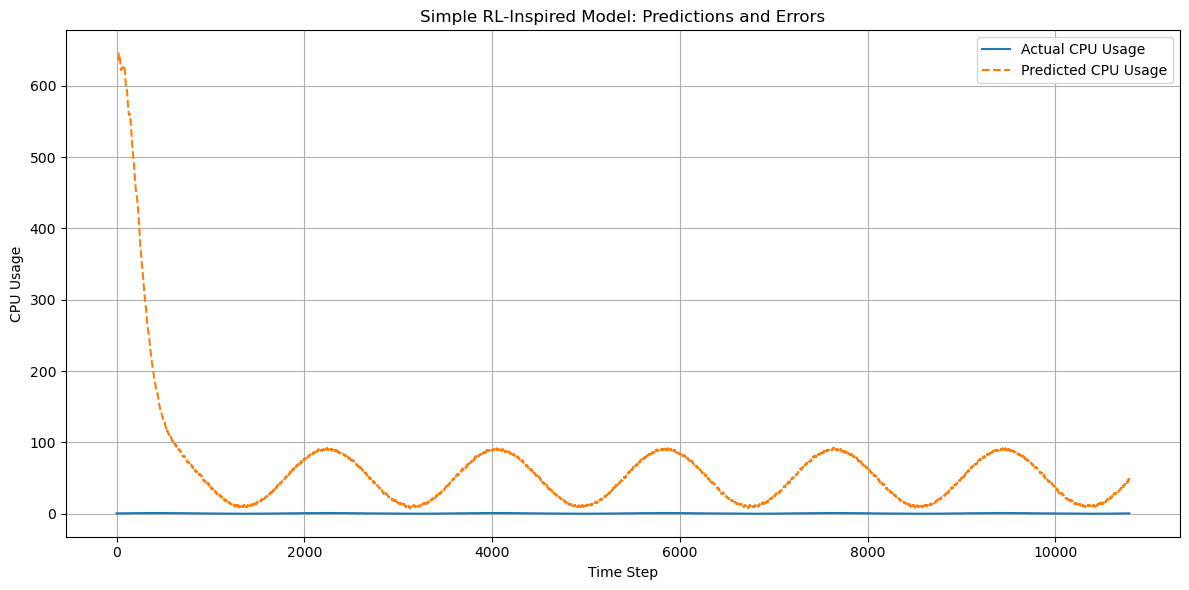

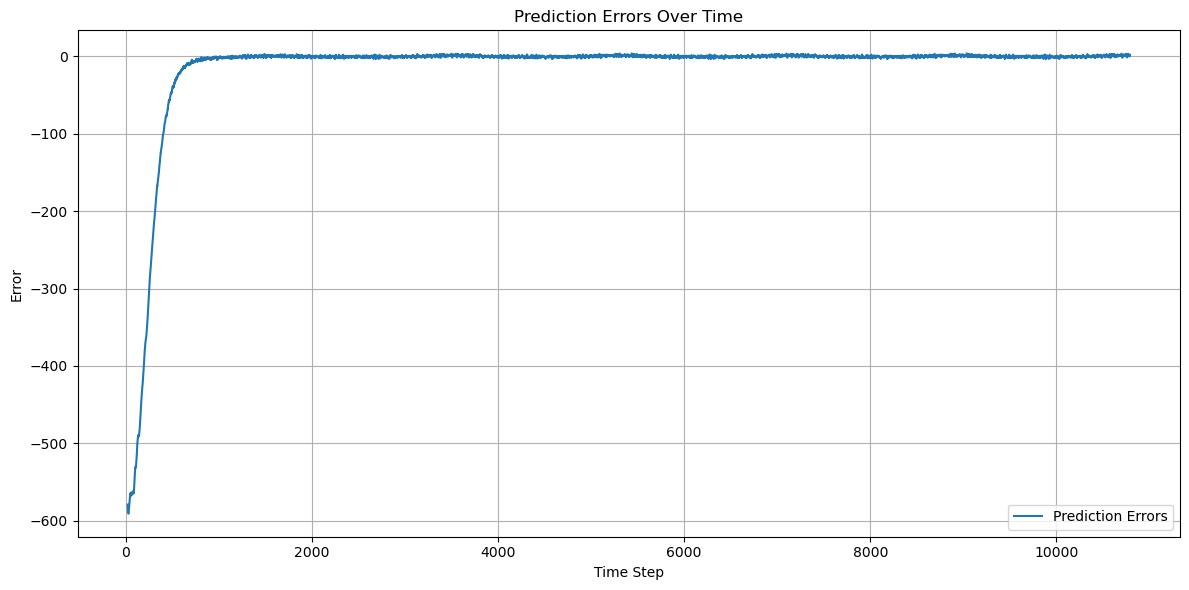

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simple RL-Inspired Model that learns from its errors
class SimpleRLModel:
    def __init__(self, window_size=10, learning_rate=0.01, error_factor=0.05):
        self.window_size = window_size
        self.learning_rate = learning_rate
        self.error_factor = error_factor  # How much to adjust based on the error
        self.weights = np.random.rand(window_size)

    def predict(self, window):
        return np.dot(self.weights, window)

    def update(self, window, true_value):
        prediction = self.predict(window)
        error = true_value - prediction
        # Adjust the weights based on the error and the previous prediction
        self.weights += self.learning_rate * error * window
        return prediction, error

    def adjust_for_error(self, error):
        # Apply a correction based on how wrong the prediction was
        return self.error_factor * error

# Load CSV file
file_path = '/Users/biraveennedunchelian/Documents/Masteroppgave/Masteroppgave/Newest addition/sinusoid curve/sinusoidal_log1idk.csv'  # Update with your file path if necessary
df = pd.read_csv(file_path)

# Normalize the entire dataset
data_normalized = (df['Y'].values - np.min(df['Y'].values)) / (np.max(df['Y'].values) - np.min(df['Y'].values))

# Smooth the data using a moving window (e.g., 10 time steps)
window_size_smooth = 10
smoothed_data = np.convolve(data_normalized, np.ones(window_size_smooth) / window_size_smooth, mode='valid')

# Initialize the model
model = SimpleRLModel(window_size=20, learning_rate=0.0005)  # Use 20 time steps

# Track predictions and errors
predictions = []
errors = []

# Train the model on the data
for i in range(20, len(smoothed_data)):
    window = smoothed_data[i - 20:i]  # Use the previous 20 time steps
    true_value = smoothed_data[i]
    
    # Get prediction and error
    prediction, error = model.update(window, true_value)
    predictions.append(prediction)
    errors.append(error)

    # Adjust based on the error
    model.adjust_for_error(error)

# Rescale the predictions and errors back to the original scale
predictions_rescaled = np.array(predictions) * (np.max(df['Y'].values) - np.min(df['Y'].values)) + np.min(df['Y'].values)
errors_rescaled = np.array(errors) * (np.max(df['Y'].values) - np.min(df['Y'].values))

# Plotting the actual data and predictions
plt.figure(figsize=(12, 6))

# Plot the actual data
plt.plot(range(len(smoothed_data)), smoothed_data, label='Actual CPU Usage')

# Plot the predictions
plt.plot(range(20, len(smoothed_data)), predictions_rescaled, label='Predicted CPU Usage', linestyle='--')

plt.xlabel('Time Step')
plt.ylabel('CPU Usage')
plt.title('Simple RL-Inspired Model: Predictions and Errors')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the error over time to see how the model is improving
plt.figure(figsize=(12, 6))
plt.plot(range(20, len(smoothed_data)), errors_rescaled, label='Prediction Errors')
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.title('Prediction Errors Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
